# Data Exploration Notebook to understand the dataset

## Import necessary Libraries

In [1]:
# Importing Essential Libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [2]:
# Read data from csv
df = pd.read_csv('./song_data.csv')

## Preliminary Exploration

In [3]:
# Gathering information about the dataset
print(f'The song data set has {df.shape[1]} features. Here are the feature names and the data types: \n {df.dtypes}')
print(f'The sample size of the song dataset is {df.shape[0]}.')

The song data set has 15 features. Here are the feature names and the data types: 
 song_name            object
song_popularity       int64
song_duration_ms      int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
audio_valence       float64
dtype: object
The sample size of the song dataset is 18835.


In [4]:
# Understanding the basic statistics of the dataset, min, max, mean and range of each feature
df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [5]:
# song duratio is in ms, this will be converted to minutes
df['song_duration_ms'] = df['song_duration_ms']/60000

# the header of the column has to change to reflect conversion to minute
df.rename(columns = {'song_duration_ms':'song_duration_m'}, inplace = True)


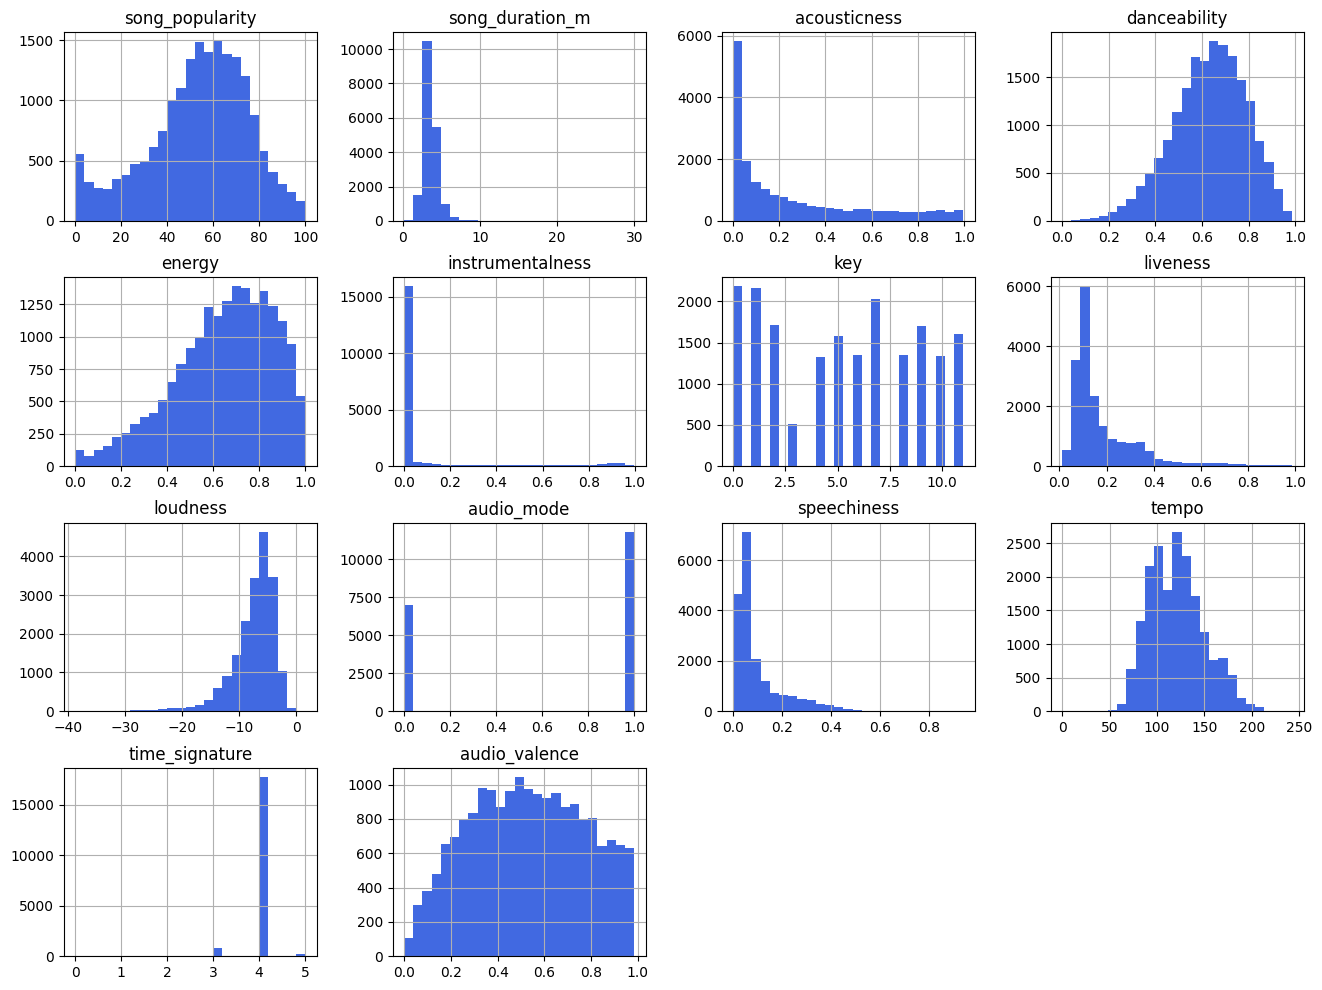

In [6]:
# Distribution of the features
hist_plot = df.hist(figsize = (16,12),
                   bins = 25,
                   color = 'royalblue')

# This visualization demonstrates the range and distribution of the features
# Then we observe that there are couple of "categorical" type of features, such as audio_mode and time_signature


## Correlation Analysis

#### In this section I attempt to identify any linkage that exists between the various columns. For instance, it is reasonable to expect a degree of dependency exists between the values of the "energy" and "loudness" of a song. I'd like to quantitatively demonstrate such dependencies  

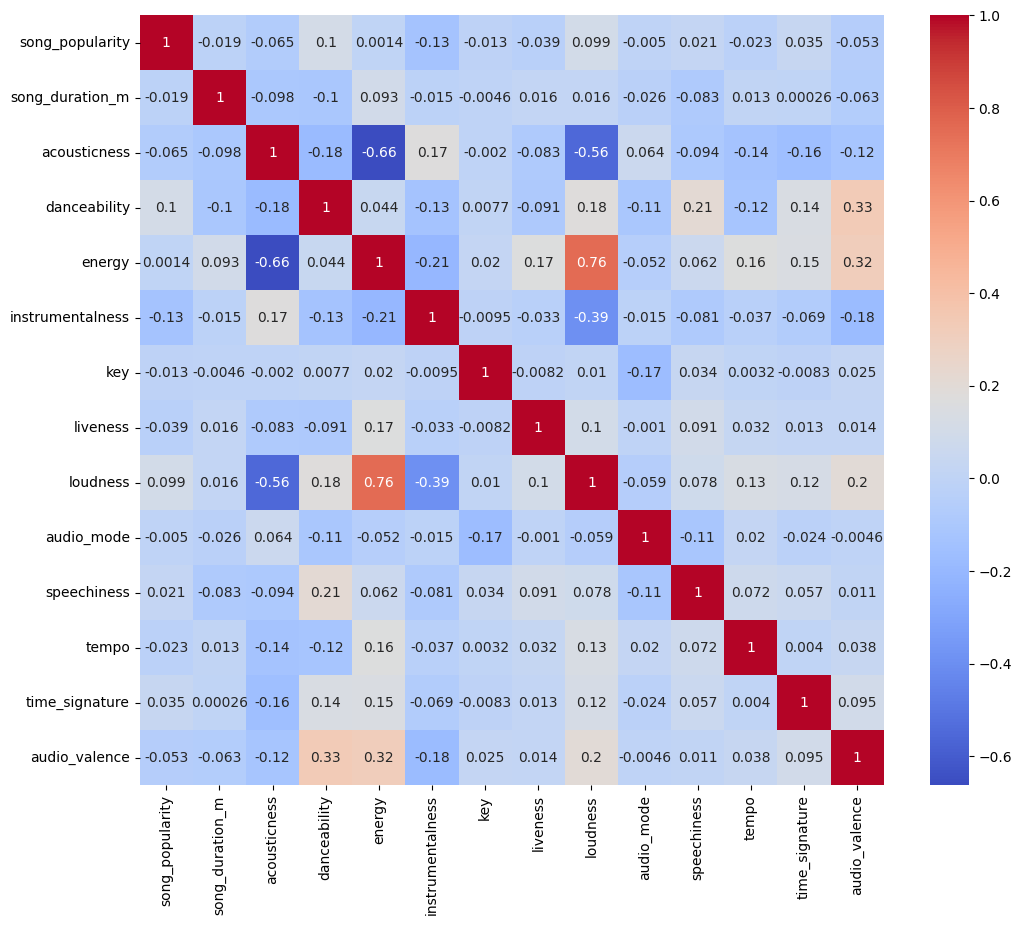

In [7]:
# Apart from one column the rest of the columns have numeric values. 
numeric_cols = df.select_dtypes(include = ['int','float64']).columns  # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html
# the corr() method in pandas creates the pairwise correlation of the columns, three types of correlation are available, the default is pearson which 
# determines the linear relation between the pairs
correlations = df[numeric_cols].corr()

# To visualize the correlation matrix, Seaborn can plot this in the form of a heatmap. Seaborn is a library based on matplotlib
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
plt.figure(figsize = (12,10))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.show()

# This shows that loudness, energy, acousticness, and instrumentalness are highly correlated. This correlation can be positive or negative. 
# This information is important when building our machine learning model. From this results, I decided to predict loudness of song based on the rest 
# the provided information about the song.
# It is interesting to see that popularity of song has no correlation with any of the given feaures!!!

# Exploring song names with two functions

In [16]:
# Here I have defined a function that return the counts of words, given the range of their popularity score

# this function is used within the second function. It removes numbers and special characters
def select_letters(item):
    new_item = ''
    remove = ['!', '(', ')', '-', '&', '[', ']', '/', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', ',', '.']
    for char in item:
        if char not in remove:
            new_item = new_item + char
    return new_item



def count_words(df, score_range):
    # first we have to filter the name column based on the score range
    song_names = df['song_name'].loc[df['song_popularity'].between(score_range[0], score_range[1])]
    # Concatenating all the words and removing any non-letter character
    names = []
    for item in df['song_name']:
        new_item  = select_letters(item) # using the function above
        words = new_item.split()
        names.append(words)
    # using list comprehension to create one huge list: This was very tricky to chenge from a for loop to list comprehension :D
    all_names = [word for item in names for word in item]
    # convert the list to a dataframe so that we can use pandas methods
    df_words = pd.DataFrame(all_names)

    return df_words.value_counts()




### Lets test our functions

In [18]:
# What are the top five words used in the songs with scores between 90 and 100
count_words(df, [90,100])[:5]

feat    1477
The     1125
You     1026
Me       880
I        726
Name: count, dtype: int64